# Instructions (Remove the instructions before submission)

This assignment will deal with tuning the hyperparameters for the [online shopping dataset](https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset). Make sure to remove the instructions and only keep Q6 onward. The qmd file of this assignment is located in the [files folder](https://georgetown.instructure.com/files/11681026/download?download_frd=1).

- This is a group assignment with independent submission on Canvas. Collaboration is essential. Use Git for version control.
- Begin by setting your random seed as the last four digits of your GUID.
- Prefix each variable with 'g#groupnumber' (e.g., g01_variableName) to ensure uniqueness and to demonstrate originality in your group's work.
- add the names of all group members to the YAML header above.
- Use of Generative AI tools, including but not restricted to GPT-3 is strictly prohibited.

## Git Commit and Collaboration

- This is a group assignment. Collaboration is essential. Use Git for version control.
- Regular and meaningful commit messages are expected, indicating steady progress and contributions from all group members.
- Avoid large, infrequent commits. Instead, aim for more minor, frequent updates showing your code's evolution and thoughts.
- Collaboration tools, especially Git, should be used as a backup tool and a truly collaborative platform. Discuss, review, and merge each other's contributions.

# Grading Criteria

- The assignment is worth 75 points.
- There are three grading milestones in the assignment.
  - Adherence to Requirements, Coding Standards, Documentation, Runtime, and Efficiency (22 Points)
    - Adherence to Requirements (5 Points): Ensure all the given requirements of the assignment, including Git commits and collaboration, are met.
    - Coding Standards (5 Points): Code should be readable and maintainable. Ensure appropriate variable naming and code commenting.
    - Documentation (6 Points): Provide explanations or reasoning for using a particular command and describe the outputs. Avoid vague descriptions; aim for clarity and depth.
    - Runtime (3 Points): The code should execute without errors and handle possible exceptions.
    - Efficiency (3 Points): Implement efficient coding practices, avoid redundancy, and optimize for performance where applicable.
  - Collaborative Programming (13 Points)
    - GitHub Repository Structure (3 Points): A well-organized repository with clear directory structures and meaningful file names.
    - Number of Commits (3 Points): Reflects steady progress and contributions from all group members.
    - Commit Quality (3 Points): Clear, descriptive commit messages representing logical chunks of work. Avoid trivial commits like "typo fix."
    - Collaboration & Contribution (4 Points): Demonstrated teamwork where each member contributes significantly. This can be seen through pull requests, code reviews, and merge activities.
  - Assignment Questions (40 Points)

# Adherence to Requirements, Coding Standards, Documentation, Runtime, and Efficiency (22 Points)
This section is graded based on adherence to Requirements, Coding Standards, 
Documentation, Runtime, and Efficiency.

# Collaborative Programming (13 Points)

This section is graded based on the Github submission. Each person needs to have made commits to the repository. GitHub Repository Structure, Number of Commits, Commit Quality, Collaboration, and Contribution are generally graded based on the group's overall performance. However, if there is a significant difference in the number of commits or contributions between group members, the instructor may adjust the grade accordingly.


# Assignment Questions (40 Points)

# Data Preparation (7 Points):

## Load the dataset and display the dataframe (2 Points).

In [2]:
import pandas as pd 

df_shopping = pd.read_csv("online_shoppers_intention.csv")

print(df_shopping.head())

   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb   

## Use `describe` to provide statistics on the pandas Dataframe (2 Points).

In [3]:
df_shopping.describe()



,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [4]:
df_shopping["Revenue"].value_counts()

Revenue
False    10422
True      1908
Name: count, dtype: int64

## Split the dataset into a Training set and a Test set. Justify your preferred split (3 Points).

In [5]:
from sklearn.model_selection import train_test_split

# "Revenue" is the target variable 

X = df_shopping.drop("Revenue", axis =1)
y = df_shopping["Revenue"]

# Split the dataset into 80% training and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [19]:
# categorical variables for one-hot encoding
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)


X_train.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
1785,0,0.0,0,0.0,7,95.000000,0.014286,0.061905,0.000000,0.0,...,False,False,True,False,False,False,False,False,False,True
10407,2,14.0,0,0.0,81,1441.910588,0.002469,0.013933,2.769599,0.0,...,False,False,False,False,True,False,False,False,False,True
286,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,False,False,True,False,False,False,False,False,False,True
6520,5,49.2,4,379.0,5,74.600000,0.000000,0.018182,8.326728,0.0,...,False,False,False,False,False,False,True,True,False,False
12251,0,0.0,1,5.0,9,279.000000,0.040000,0.041667,0.000000,0.0,...,False,False,False,False,True,False,False,True,False,False


In [20]:
print(type(X))

print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [21]:
# Ensure that train and test set have the same columns after encoding
X_train, X_test = X_train.align(X_test, axis=1, fill_value=0)

# Classification Routine (12 Points):

Execute a classification routine using RandomForestClassifier(), BaggingClassifier(), and XGboostclassifier(). Independently output the accuracy box plot as discussed in class. Use any package you are comfortable with (seaborn, matplotlib).

## RandomForestClassifier():

In [34]:
import random
from seaborn.palettes import color_palette
random.seed(4444)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import  RandomForestClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier

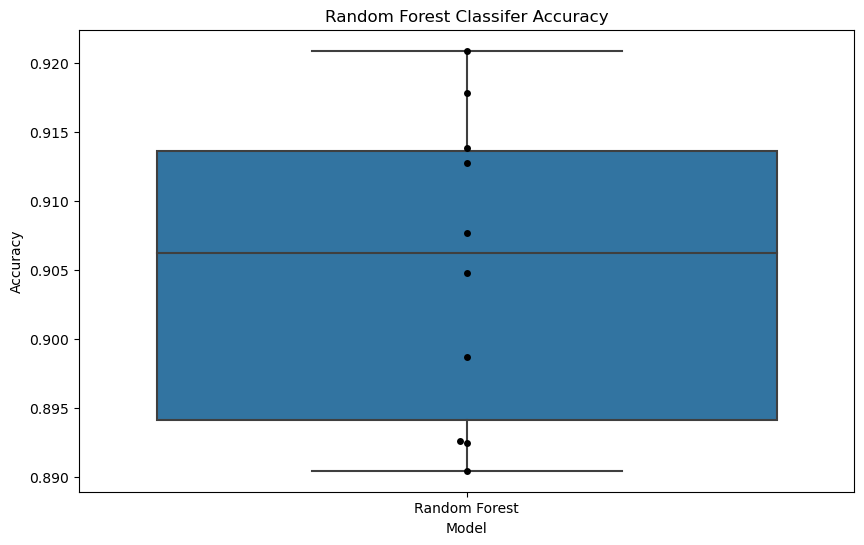

In [30]:
rf = RandomForestClassifier(random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(rf, X_train, y_train, cv=10, scoring='accuracy')

# Convert scores to a DataFrame for visualization
df_scores = pd.DataFrame({
    'Model': ['Random Forest'] * len(cv_scores),
    'Accuracy': cv_scores
})

# plot the results 
plt.figure(figsize=(10,6))
sns.boxplot(x=df_scores['Model'], y=df_scores['Accuracy'])
sns.swarmplot(x=df_scores['Model'], y=df_scores['Accuracy'], color='black')
plt.title('Random Forest Classifer Accuracy')
plt.show()




## BaggingClassifier():

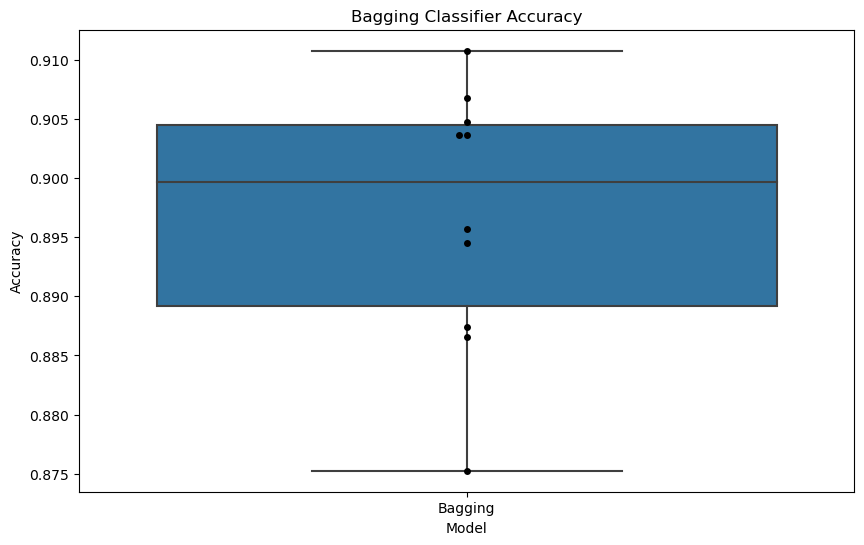

In [31]:
bagging = BaggingClassifier(random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(bagging, X_train, y_train, cv=10, scoring='accuracy')

# Convert scores to a DataFrame for visualization
df_scores = pd.DataFrame({
    'Model': ['Bagging'] * len(cv_scores),
    'Accuracy': cv_scores
})

plt.figure(figsize=(10,6))
sns.boxplot(x=df_scores['Model'], y=df_scores['Accuracy'])
sns.swarmplot(x=df_scores['Model'], y=df_scores['Accuracy'], color='black')
plt.title('Bagging Classifier Accuracy')
plt.show()


## XGboostclassifier():

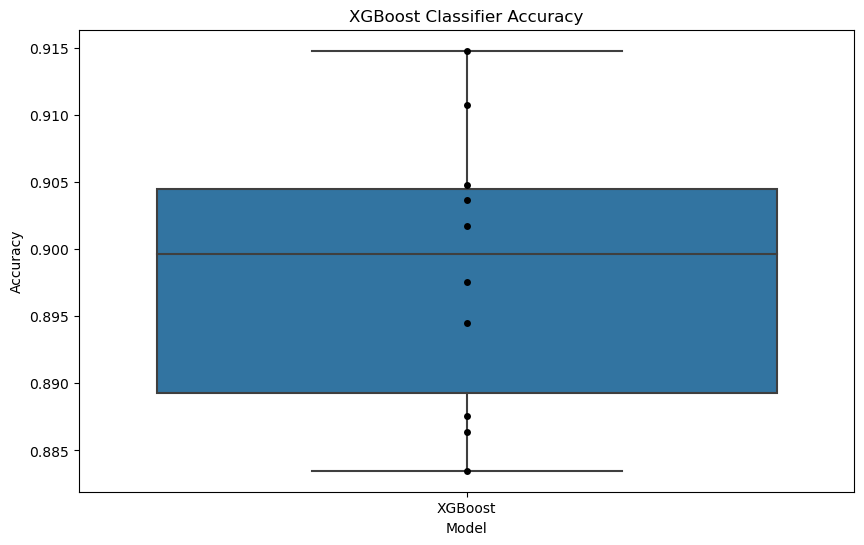

In [33]:
xgb =  XGBClassifier(random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(xgb, X_train, y_train, cv=10, scoring='accuracy')

# Convert scores to a DataFrame for visualization
df_scores = pd.DataFrame({
    'Model': ['XGBoost'] * len(cv_scores),
    'Accuracy': cv_scores
})

plt.figure(figsize=(10,6))
sns.boxplot(x=df_scores['Model'], y=df_scores['Accuracy'])
sns.swarmplot(x=df_scores['Model'], y=df_scores['Accuracy'], color='black')
plt.title('XGBoost Classifier Accuracy')
plt.show()

# Classification with GridSearchCV (8 Points):

Replicate the classification from Q2 using GridsearchCV().

In [37]:
def parameter_tuning(model, param_grid, x_train, y_train, x_test, y_test, model_name):
    # Perform GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', return_train_score=True)
    grid_search.fit(x_train, y_train)
    
    # Get the best hyperparameters and model
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_
    
    # Make predictions with the best model
    y_pred = best_model.predict(x_test)
    
    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
 
 
    cv_scores = grid_search.cv_results_['mean_test_score']
    plt.figure(figsize=(10,6))
    sns.boxplot(y=cv_scores)
    plt.title(f"Accuracy Box Plot for {model_name} Best Model")
    plt.ylabel('Accuracy')
    plt.show()
    
    return best_params, best_model, accuracy

/Users/nuoyawu/opt/anaconda3/envs/dsan6600/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
360 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/nuoyawu/opt/anaconda3/envs/dsan6600/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/nuoyawu/opt/anaconda3/envs/dsan6600/lib/python3.11/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/Users/nuoyawu/opt/anaconda3/envs/dsan6600/lib/python3.11/site-packages/sklearn/base.py

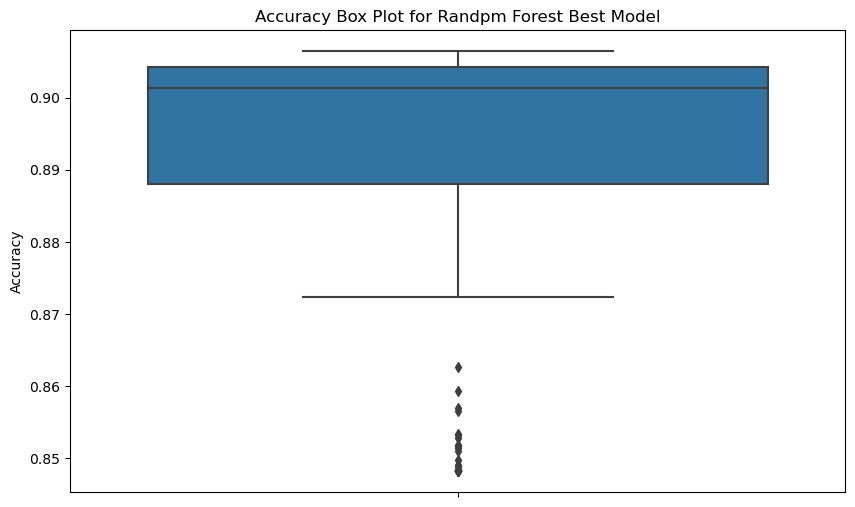

({'max_depth': 15,
  'max_features': 'log2',
  'min_samples_split': 2,
  'n_estimators': 50},
 RandomForestClassifier(max_depth=15, max_features='log2', n_estimators=50),
 0.8888888888888888)

In [40]:
# parameter grid for random forest 
param_grid_rf = {
    'n_estimators': [10, 50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [3, 5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
}


parameter_tuning(RandomForestClassifier(), param_grid_rf, X_train, y_train, X_test, y_test, "Randpm Forest")


# Classification with RandomSearchCV (8 Points):

Replicate the classification from Q2 using RandomSearchCV().

In [ ]:
# Add code here

# Comparison and Analysis (5 Points):

Compare the results from Q2, Q3, and Q4. Describe the best hyperparameters for all three experiments.